**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups #,fetch_mldata

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [34]:
from scipy.spatial import distance
from sklearn.neighbors import KDTree
class MyKNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.k=n_neighbors
        self.metric='euclidean'
        self.alg=algorithm
        self.cla=10
    
    def fit(self, X, y):
        self.data=X#(X-np.expand_dims(X.min(axis=1), axis=1))/(np.expand_dims(X.max(axis=1), axis=1)-np.expand_dims(X.min(axis=1), axis=1))
        self.clas=y
        self.tree = KDTree(X, leaf_size=12)
        
    def findkneighbors (self,X):
        if (self.alg=='kd_tree'):
            ind = self.tree.query(X, k=3,return_distance=False)
        else:
            metrix=distance.cdist(X,self.data,metric=self.metric)
            ind=metrix.argsort(axis=1)[:,:self.k:]
        return ind
    
    def changemetr(self,str):
        self.metric=str
        
    def predict(self, X):
        kne=self.findkneighbors(X)
        pred=[]
        for i in range(kne.shape[0]):
            pred.append(np.argmax(np.bincount(self.clas[kne[i]],minlength=self.cla)))
        return np.asarray(pred)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 809 µs, sys: 382 µs, total: 1.19 ms
Wall time: 892 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 161 µs, sys: 18 µs, total: 179 µs
Wall time: 173 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 2.13 ms, sys: 978 µs, total: 3.11 ms
Wall time: 2.81 ms


array([2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 634 µs, sys: 205 µs, total: 839 µs
Wall time: 619 µs


array([2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 763 µs, sys: 133 µs, total: 896 µs
Wall time: 816 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 189 µs, sys: 16 µs, total: 205 µs
Wall time: 216 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 2.2 ms, sys: 931 µs, total: 3.13 ms
Wall time: 2.63 ms


array([1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 521 µs, sys: 221 µs, total: 742 µs
Wall time: 549 µs


array([1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer as cv

vect=cv(stop_words='english',min_df=100,max_df=3000)
vect.fit(data)
spis=vect.transform(data).toarray()
nam=np.asarray(vect.get_feature_names())

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score
begi=KFold(n_splits=3)

In [23]:
#from sklearn.metrics import make_scorer
#scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
for train, test in begi.split(spis):
    train=np.asarray(train)
    test=np.asarray(test)
    turain = MyKNeighborsClassifier()
    turain.fit(spis[train],target[train])
    lol=turain.predict(spis[test])
    print(accuracy_score(target[test], lol))
    #print(cross_val_score(turain,spis[test],target[test],scoring='accuracy'))

0.2404559915164369
0.23760275788915408
0.2381331211880138


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
knn=[]
for i in range(1,11):
    s=0
    for train, test in begi.split(spis):
        train=np.asarray(train)
        test=np.asarray(test)
        turain = MyKNeighborsClassifier(n_neighbors=i)
        turain.fit(spis[train],target[train])
        lol=turain.predict(spis[test])
        s+=accuracy_score(target[test], lol)
    s/=3
    print(s)
    knn.append(s)
print(knn)

0.2542871033324494
0.22944992195935587
0.22945071872288367
0.2300694759048867
0.23873062353120159
0.24102881762448422
0.24288476109139356
0.24164722329316612
0.23987936906452179
0.24014443354284465
[0.2542871033324494, 0.22944992195935587, 0.22945071872288367, 0.2300694759048867, 0.23873062353120159, 0.24102881762448422, 0.24288476109139356, 0.24164722329316612, 0.23987936906452179, 0.24014443354284465]


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

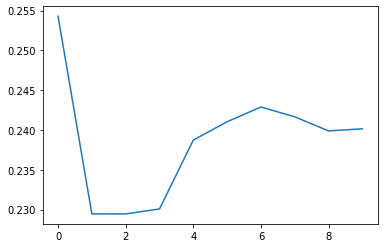

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(knn)

In [41]:
kun=[]
for i in range(1,11):
    s=0
    for train, test in begi.split(spis):
        train=np.asarray(train)
        test=np.asarray(test)
        turain = MyKNeighborsClassifier(n_neighbors=i)
        turain.changemetr('cosine')
        turain.fit(spis[train],target[train])
        lol=turain.predict(spis[test])
        s+=accuracy_score(target[test], lol)
    s/=3
    print(s)
    kun.append(s)
print(kun)

0.37360783149182536
0.35071540928476974
0.3763470341977468
0.3904885088420598
0.40091793251300434
0.40851982989754837
0.41452988749042835
0.4193912464184308
0.4243408586242481
0.42858376501512585
[0.37360783149182536, 0.35071540928476974, 0.3763470341977468, 0.3904885088420598, 0.40091793251300434, 0.40851982989754837, 0.41452988749042835, 0.4193912464184308, 0.4243408586242481, 0.42858376501512585]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer as Tdf

vect2=Tdf(stop_words='english',min_df=100,max_df=3000)
vect2.fit(data)
spis3=vect2.transform(data).toarray()
nam3=np.asarray(vect2.get_feature_names())

In [159]:
knn3=[]
kun=[]
for i in range(1,11):
    s=0
    for train, test in begi.split(spis3):
        train=np.asarray(train)
        test=np.asarray(test)
        turain = MyKNeighborsClassifier(n_neighbors=i)
        turain.fit(spis3[train],target[train])
        lol=turain.predict(spis3[test])
        s+=accuracy_score(target[test], lol)
    s/=3
    print(s)
    kun.append(s)
knn3.append(kun)
kun=[]
for i in range(1,11):
    s=0
    for train, test in begi.split(spis3):
        train=np.asarray(train)
        test=np.asarray(test)
        turain = MyKNeighborsClassifier(n_neighbors=i)
        turain.changemetr('cosine')
        turain.fit(spis3[train],target[train])
        lol=turain.predict(spis3[test])
        s+=accuracy_score(target[test], lol)
    s/=3
    print(s)
    kun.append(s)
knn3.append(kun)
print(knn3)

0.1877318757622566
0.15299589179351378
0.1454831147529766
0.14000356106428485
0.13381627045491165
0.13036900274920912
0.12780586134871066
0.12453575635683718
0.12400558053174875
0.12312152452920884
0.4073721389041914
0.38615852088443753
0.40931610130670154
0.429025664128178
0.4446706784178976
0.45350919966603426
0.45925461459657657
0.46340821316967623
0.4670321749047797
0.4710096653040135
[[0.1877318757622566, 0.15299589179351378, 0.1454831147529766, 0.14000356106428485, 0.13381627045491165, 0.13036900274920912, 0.12780586134871066, 0.12453575635683718, 0.12400558053174875, 0.12312152452920884], [0.4073721389041914, 0.38615852088443753, 0.40931610130670154, 0.429025664128178, 0.4446706784178976, 0.45350919966603426, 0.45925461459657657, 0.46340821316967623, 0.4670321749047797, 0.4710096653040135]]


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [38]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [39]:
turain = MyKNeighborsClassifier(n_neighbors=10) #оптимальный по валидации
turain.changemetr('cosine')
turain.fit(spis3,target)
lol=turain.predict(spis2)
s=accuracy_score(newsgroups['target'], lol)
print(s)

0.39272437599575144
